# Vertical Diffusivity

Here I'd like to look at how vertical diffusivity (vertical eddy diffusivity) looks in the Arctic region.
I will first look at horizontal slices of this variable.


In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
import matplotlib.colors as colors
from IPython.display import display, Math, Latex

from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import warnings

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import map

%matplotlib inline


In [2]:
control = '/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
polzin = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'

In [3]:
year = '2011'
month = '01'
day = '05'

In [4]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)

In [18]:
# cgridW = nc.Dataset(control+'y'+year+'m'+month+'d'+day+'_gridW.nc')
# pgridW = nc.Dataset(polzin+'y'+year+'m'+month+'d'+day+'_gridW.nc')
# sjgridW = nc.Dataset(sandj+'y'+year+'m'+month+'d'+day+'_gridW.nc')
ckap = ma.array(nc.Dataset(control_storage+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)

pkap = ma.array(nc.Dataset(polzin+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)

sjkap = ma.array(nc.Dataset(stlandj+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)


In [13]:
ckap = ma.array(nc.Dataset(control_storage+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'])

In [20]:
print(ckap[:,300,300])
print(zlevels)

[0.01929896926425225 6.108816154758057 5.802927713036634 5.607914705162666
 5.428115617108295 5.266719362830372 5.101768087483335 4.951021069878314
 4.786899154963565 4.621449505682368 4.450850206765608 4.295583325723857
 4.1180752863443955 3.9298934817235733 3.745831278817455 3.5469285475813455
 3.3572556230475965 3.1584301071580576 2.93922922054375 2.7275957271013818
 2.48749936775302 2.222383873542556 1.86936805448049 1.5510998856707685
 1.2509634348903091 0.9612902063863875 0.7871733288972499
 0.6070736436775387 0.42031645367197684 0.25368651395316094
 0.11089004161146464 1.0282614589227269e-05 1.0000301805519807e-05
 1.000028050091789e-05 9.999999747378752e-06 9.999999747378752e-06
 1.0000382311374455e-05 9.999999747378752e-06 9.999999747378752e-06
 1.040680032854478e-05 1.077401341792385e-05 1.163755620824578e-05
 1.2606724966059269e-05 1.4219193588684143e-05 1.676958743402095e-05
 2.018380749563819e-05 -- -- -- --]
[  4.94025373e-01   1.54137544e+00   2.64566855e+00   3.81949484

In [6]:
zlevels=mesh.variables['gdept_0'][0]
nav_lat=mesh.variables['nav_lat']
nav_lon=mesh.variables['nav_lon']
# e1t= mesh.variables['e1t'][0,:,:]  # dx
# e2t= mesh.variables['e2t'][0,:,:]  # dy 
# e3t= mesh.variables['e3t'][0,:,:,:]
# volume=e1t*e2t*e3t
# volume_density = (volume / np.sum(volume))*100

In [8]:
# u_velt = nc.Dataset('//mnt//storage0//xhu//NEMO//ANHA4-EXH005//ANHA4-EXH005_y2004m12d21_gridU.nc')
# v_velt = nc.Dataset('//mnt//storage0//xhu//NEMO//ANHA4-EXH005//ANHA4-EXH005_y2004m12d21_gridV.nc')
# w_velt = nc.Dataset('//mnt//storage0//xhu//NEMO//ANHA4-EXH005//ANHA4-EXH005_y2004m12d21_gridW.nc')
# tracert = nc.Dataset('//mnt//storage0//xhu//NEMO//ANHA4-EXH005//ANHA4-EXH005_y2004m12d21_gridT.nc')


# u_vel = nc.Dataset('/mnt/storage3/xhu/NEMO/ANHA4-EXH009/ANHA4-EXH009_y2004m12d21_gridU.nc')
# v_vel = nc.Dataset('/mnt/storage3/xhu/NEMO/ANHA4-EXH009/ANHA4-EXH009_y2004m12d21_gridV.nc')
# w_vel = nc.Dataset('/mnt/storage3/xhu/NEMO/ANHA4-EXH009/ANHA4-EXH009_y2004m12d21_gridW.nc')
# tracer = nc.Dataset('/mnt/storage3/xhu/NEMO/ANHA4-EXH009/ANHA4-EXH009_y2004m12d21_gridT.nc')

In [9]:
#First look at the dimensions of the fields


In [10]:
#Noww looking at the contained variables
#nc_tools.show_variables(tracer)

The first 5 variables correspond to the dataset's dimensions:

nav_lon and nav_lat contain the longitudes and latitudes of lateral grid points

depthu contains the depths of the vertical grid layers

time_counter contains the model time values at the centre of each of the output intervals

The other 2 are calculated values from NEMO:

_votkeavt_ is the vertical eddy diffusivity component


In [7]:
veddyv = w_vel.variables['votkeavt']
zlevels = w_vel.variables['depthw']
timesteps = w_vel.variables['time_counter']

temp = tracer.variables['votemper']

sal = tracer.variables['vosaline']

nav_lon=w_vel.variables['nav_lon'][:]
nav_lat=w_vel.variables['nav_lat'][:]

veddyvt = w_velt.variables['votkeavt']
zlevelst = w_velt.variables['depthw']
timestepst = w_velt.variables['time_counter']

tempt = tracert.variables['votemper']

salt = tracert.variables['vosaline']

nav_lont=w_velt.variables['nav_lon'][:]
nav_latt=w_velt.variables['nav_lat'][:]

print(sal[0].shape)
veddyv[0]

NameError: name 'w_vel' is not defined

In [11]:
#partition into the wanted area
# t, zlevel = 0, 0
# ved_part = np.ma.masked_values(veddyv[t, zlevel, 450:800,50:544], 0)

# ved_part.shape

In [18]:
def plot_eddyh(t,zlevel, veddy, ax):
    ved_part = np.ma.masked_values(veddy[t, zlevel, 450:800,50:544], 10)
    cmap = plt.get_cmap('jet')
    cmap.set_bad('burlywood')
    mesh = ax.pcolormesh(ved_part, norm=colors.LogNorm(vmin=ved_part.min(), vmax=ved_part.max()) ,cmap=cmap)
    cbar = fig.colorbar(mesh,ax=ax)
    plt.axis((0, ved_part.shape[1], 0, ved_part.shape[0]))
    ax.grid()

    ax.set_xlabel('x Index')
    ax.set_ylabel('y Index')
    cbar.set_label('{label} [{units}]'.format(label=veddyv.long_name.title(), units=veddyv.units))
    ax.set_title(u't = {t:.1f} Day, depth \u2248 {d:.2f}{z.units}'.format(t=7, d=zlevels[zlevel], z=zlevels))
    return True
    

In [13]:
#norm=LogNorm(vmin=Z1.min(), vmax=Z1.max())

#veddyv[0,5,600:700,200:300]

In [14]:
# fig, ax = plt.subplots(10, 1, figsize=(10, 60))
# zlevel = (0,5,10,15,20,25,30,35,40,45)
# for axis, depth in zip(ax[:],zlevel):
#     plot_eddyh(0,depth,veddyv,axis)

In [7]:
def plot_base(t,zlevel, veddy,ax):
    #ved_part = np.ma.masked_values(veddy[t, zlevel, 450:800,50:544], 10)
    ved_part = veddy[t, zlevel,:,:]
    cmap = plt.get_cmap('seismic')
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85')
    m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
    m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
    x_lon, y_lat = m(nav_lon, nav_lat)
    m = m.pcolor(x_lon[:,:],y_lat[:,:],ved_part,cmap=cmap)
                 #norm=colors.LogNorm(vmin=ved_part.min(), vmax=ved_part.max()))
    cbar = fig.colorbar(m,ax=ax,shrink=.8)

    #cbar.set_label('Control-Tidal Mixing {label} [{units}]'.format(label=sal.long_name.title(), units=sal.units))
    #ax.set_title(u'2004/12/21, depth \u2248 {d:.2f}{z.units}'.format(d=zlevels[zlevel], z=zlevels))
    return True

NameError: name 'veddyv' is not defined

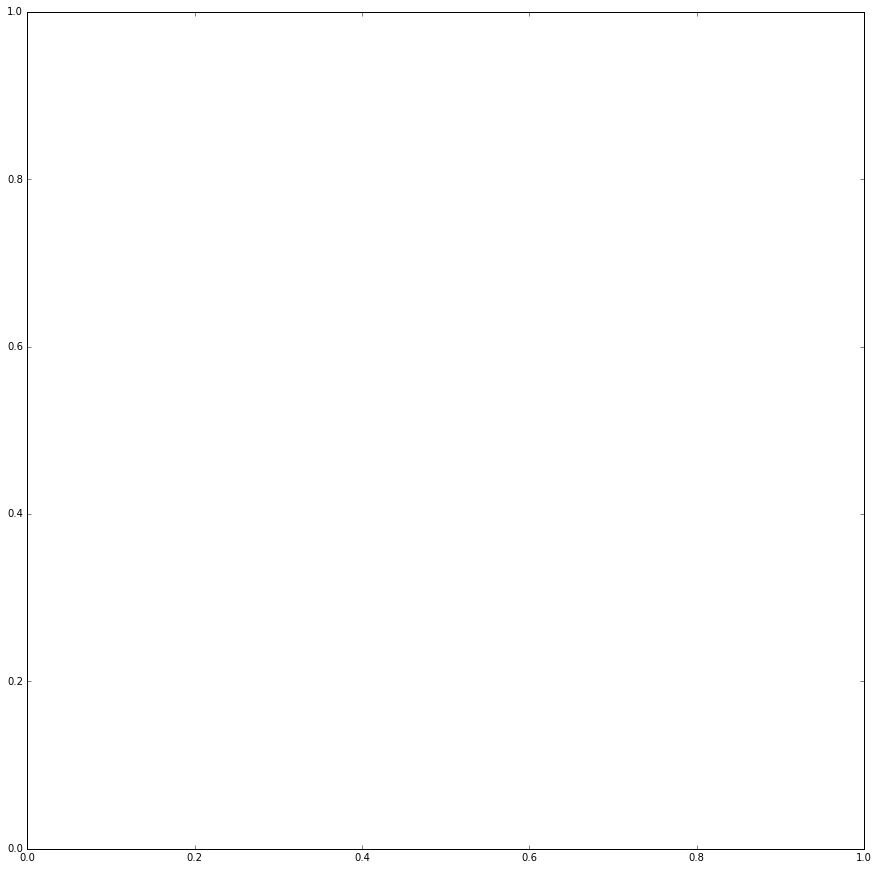

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
plot_base(0,25,veddyv,axes)

In [8]:
def plot_kappa(ax,zonal_var,min_log,max_scale,zlevel, depth, ticks=None,sym=False):
    
    '''
    zonal_var = zonal variable that is 50X800
    min_log = either the minimum value in log or the smallest log on positive or negative magnitude in symlog
    max_scale = max value of variable
    title = title of the contour plot
    ticks = optional variable that can contain a list of ticks for the colorbar
    sym = if set to true the symlog scale will be used to account for positive and negative values
    
    '''
    #ig, ax = plt.subplots(1, 1, figsize=(20, 20))
    
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True',ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85',alpha=0.5)
    m.drawparallels(np.arange(-90.,90.,20.),labels=[0, 0, 0, 0])
    x_lon,y_lat=m(nav_lon[300:,:],nav_lat[300:,:])
    vmax = 10**(-15)
    
    
     # Define scaling levels for the logarithmic colouring.
    minimum_log_level = min_log
    maximum_scale_level = max_scale
    # Use a standard colour map which varies blue-white-red.
    # For suitable options, see the 'Diverging colormaps' section in:
    # http://matplotlib.org/examples/color/colormaps_reference.html

    # Create a 'logarithmic' data normalization.
    
    x = np.arange(0,800)
    y = np.arange(0,544)
    X, Y = np.meshgrid(x[:], y[:])
    
    if sym == False:
        norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)
        cmap = plt.get_cmap('jet',25)
        cmap.set_bad('burlywood')
        cmap.set_over(color='grey')
        
    if sym == True:
        norm = colors.SymLogNorm(vmin=-maximum_scale_level,
                                 vmax=maximum_scale_level,linthresh=minimum_log_level,linscale=0)
        cmap = plt.get_cmap('seismic')
        cmap.set_bad('burlywood')
        cmap.set_over(color='grey')
        print('symlog')
    
    
    # Setting "linthresh=minimum_log_level" makes its non-logarithmic
    # data range equal to our 'zero band'.
    # Setting "linscale=0" maps the whole zero band to the middle colour value
    # (i.e. 0.5), which is the neutral point of a "diverging" style colormap.

    # Make a pseudocolour plot using this colour scheme.
    
    #mesh = ax.pcolormesh(zonal_var[:,:], cmap=cmap, norm=norm)
    
    
    m.pcolor(x_lon,y_lat,zonal_var[:,:],cmap=cmap,norm=norm)
    #m.colorbar()
    # Add a colourbar, with extensions to show handling of out-of-range values.
#     bar = plt.colorbar(mesh)

#     #Set some suitable fixed "logarithmic" colourbar tick positions.
    
#     if sym ==True:
# #         tick_levels = [-0.000001,-0.00001, -0.0001,-0.001,-0.01,-0.1,-1,-10,-100,
# #                    0.0, 100,10,1,0.1,0.01,0.001,0.0001, 0.00001,0.000001]
#         bar.set_ticks(ticks)
        
#         #Modify the tick labels so that the centre one shows "+/-<minumum-level>".
#         ticks[5] = r'$\pm${:g}'.format(minimum_log_level)
#         bar.set_ticklabels(ticks)

#     bar.ax.tick_params(labelsize=15) 
#     # Label the colourbar to show the units.
#     bar.set_label('[Kappa log scale]',size=15)
    


#     ax.grid()    
    ax.set_title('{d:.0f} m'.format(d=zlevels[depth]),fontsize=16)
#     ax.set_title('control-stlaurent+jayne-2011/01/05 '+str(zlevel[depth])+'m depth')
#     ax.tick_params(which='both', bottom='off',top='off',labelbottom='off',labelleft='off')
#     ax.axis((0, zonal_var.shape[1], 0, zonal_var.shape[0]))
    
    return mesh


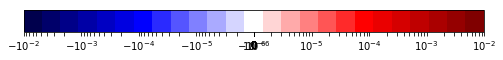

In [43]:
import matplotlib as mpl

maximum = 10**-2
minimum = 10**-6
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.9, 0.15, 0.8, 0.1])
norm = colors.SymLogNorm(vmin=-maximum,vmax=maximum,linthresh=minimum,linscale=0)
cmap = plt.get_cmap('seismic',25)
#ticks = [-10**-2, -10**-3, -10**-4, -10**-5,10**-6, 10**-5, 10**-4, 10**-3, 10**-2] 
#ticks[5] = r'$\pm${:g}'.format(10**-6)
tick_label = ['-10**-2', '-10**-3', '-10**-4', '-10**-5', '10**-5', '10**-4', '10**-3', '10**-2']
cb1 = mpl.colorbar.ColorbarBase(ax1,orientation='horizontal', cmap=cmap,norm=norm)
cb1.set_ticklabels(tick_label)
#cb1.set_label(r'$\kappa$'+' ('+r'$\frac{m^2}{s}$'+')')


7.12198628578 -8.32628500421
symlog
5.79303270976 -4.81747505935
symlog
6.99168625633 -3.04402941031
symlog


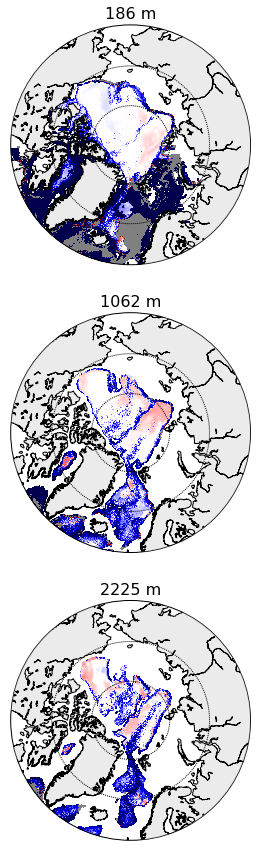

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(5, 15))
zlevel = (25,35,40)
variable = ckap[:,300:,:]- sjkap[:,300:,:]

for axis, depth in zip(axes[:],zlevel):
    print(variable[depth,:,:].max(), variable[depth,:,:].min())
    mesh = plot_kappa(axis,variable[depth,:,:],10**-6,10**-2,zlevels, depth,sym=True)

# ticks = [-10**-1,-10**-2, -10**-3, -10**-4, -10**-5,10**-6, 10**-5, 10**-4, 10**-3, 10**-2,10**-1]    
# bar = plt.k(mesh,orientation='horizontal')
# ticks[5] = r'$\pm${:g}'.format(10**-6)
# tick_label = ['-10**-1','-10**-2', '-10**-3', '-10**-4', '-10**-5','10**-6', '10**-5', '10**-4', '10**-3', '10**-2','10**-1']
# bar.ax.set_xticklabels(tick_label,rotation=70)
# plt.tight_layout()


### 1. There are numerous regions where the maximum value of vertical eddy diffusivity(VED) is reached (10 m^2/s)
2. Seems to be higher magnitudes of VED in the Kara and Laptev Seas ad greater depths (eg view the ~70m depth plot)

#Bottom Boundary VED
using the bathymetry data
look at what depths correspond to which zlevel to create 'depth bins' 

In [ ]:
grid = nc.Dataset('//ocean//xiaoxiny//research//data//Jasper//ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = grid.variables['Bathymetry'][:]
bathy = ma.masked_values(bathy[450:800,50:544],0)

In [ ]:
bathy.shape

In [ ]:
ved_part = veddyv[0, :, 450:800,50:544]
ved_bound = np.zeros_like(ved_part[0])
print(ved_part.shape, ved_bound.shape)


In [ ]:
# partition 450:800,50:544
# found the z coordinate that was closest with our going over the depth in the bathymetry for each grid cell
for x in np.arange(0,350):
    for y in np.arange(0,494):
        depth = bathy[x,y]
        for z in np.arange(0,50):
            if zlevels[z] == depth:
                if (z != 0) or (z!=1):
                    ved_bound[x,y] = ved_part[z-1, x,y]
                else:
                    ved_bound[x,y] = ved_part[z,x,y]
                break
            elif zlevels[z] > depth:
                if ma.is_masked(ved_part[z-1, x,y]):
                    ved_bound[x,y] = ved_part[z-2, x,y]
                else:
                    ved_bound[x,y] = ved_part[z-1, x,y]
                break
                

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
#ved_bound = np.ma.masked_values(ved_bound, 10)
cmap = plt.get_cmap('jet')
#cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ved_bound,norm=colors.LogNorm(vmin=ved_bound.min(), vmax=ved_bound.max()), cmap=cmap)
cbar = fig.colorbar(mesh,ax=ax)
plt.axis((0, ved_bound.shape[1], 0, ved_bound.shape[0]))
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
cbar.set_label('{label} [{units}]'.format(label=veddyv.long_name.title(), units=veddyv.units))
#ax.set_title(u't = {t:.1f} Day, depth \u2248 {d:.2f}{z.units}'.format(t=7, d=zlevels[zlevel], z=zlevels))